In [64]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.text as text 
from sqlalchemy import desc


In [65]:
import numpy as np
import pandas as pd

In [66]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import text
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine
from sqlalchemy import desc
from sqlalchemy import func
from sqlalchemy import create_engine, inspect, func, func
from flask import Flask, jsonify

In [68]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [69]:
# reflect an existing database into a new model
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

In [70]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [71]:
# Save references to each table
Measure = Base.classes.measurement

In [72]:
Station = Base.classes.station

In [73]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [74]:
first_row = session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25ed91de4c8>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [75]:
station_row = session.query(Station).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25ed91dee88>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months=session.query(Measure.tobs,func.count(Measure.station)).filter(Measure.date > '2016-08-22', Measure.date <'2017-08-24').group_by(Measure.station).order_by(desc(func.count(Measure.station))).all()
last_12_months

[(81.0, 361),
 (77.0, 352),
 (74.0, 349),
 (76.0, 343),
 (80.0, 337),
 (80.0, 305),
 (80.0, 183)]

# Exploratory Climate Analysis

In [81]:
#Load the query results into a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12_months, columns=['date', 'prcp'])
#df.set_index('date',inplace=True)

In [85]:
#Sort the DataFrame values by date.
df = df.sort_values('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      float64
 1   prcp    7 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 168.0 bytes


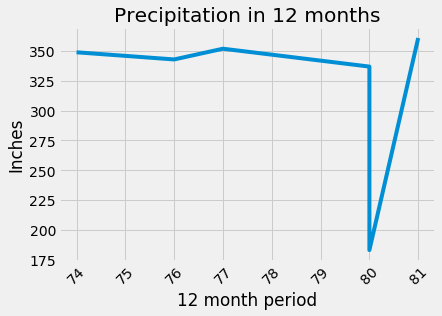

In [86]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as pyplot
figsize=(10,5)
pyplot.plot(df['date'],df['prcp'])
plt.xticks(rotation=45)
pyplot.title('Precipitation in 12 months')
#plt._xlim(df['date'])
plt.xlabel("12 month period")
plt.ylabel("Inches")

pyplot.show()

In [87]:
# last data point
Latest_date = session.query(func.max(Measure.date)).all()
#print(latest_date)
End_Date = Latest_date[0][0]
print(End_Date)

2017-08-23


In [88]:
#Step 2: Get the year old date (Last year)
Struct = dt.date.today()
End_Date_dateformat = Struct.replace(year=int(End_Date[:4]),month=int(End_Date[5:7]),day=int(End_Date[8:]))
Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
Start_Date = Last_date_year.strftime("%Y-%m-%d")
print(Start_Date)
print(type(Start_Date))

2016-08-23
<class 'str'>


In [89]:
df['date']=pd.to_datetime(df['date'])

In [90]:
df.head()

,date,prcp
2,1970-01-01 00:00:00.000000074,349
3,1970-01-01 00:00:00.000000076,343
1,1970-01-01 00:00:00.000000077,352
4,1970-01-01 00:00:00.000000080,337
5,1970-01-01 00:00:00.000000080,305


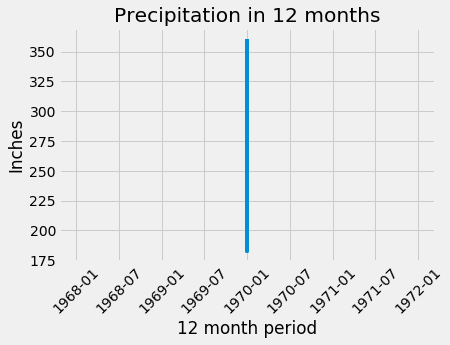

In [91]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as pyplot
figsize=(10,5)
pyplot.plot(df['date'],df['prcp'])
plt.xticks(rotation=45)
pyplot.title('Precipitation in 12 months')
#plt._xlim(df['date'])
plt.xlabel("12 month period")
plt.ylabel("Inches")

pyplot.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].agg(['count','mean','std', 'min','max']).round()

count    2021.0
mean        0.0
std         0.0
min         0.0
max         7.0
Name: prcp, dtype: float64

In [24]:
# Sort the dataframe by date
df=df.sort_values(['date'])
#df.head(20)

In [25]:
#Earliest date
old_date=session.query(func.min(Measure.date)).all()
#print(old_date)
Beginning_date = old_date[0][0]
print(Beginning_date)



2010-01-01


In [26]:
#Step 2: Get the year old date (Last year)

Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
print(Last_date_year)
print(type(Last_date_year))

2016-08-23
<class 'datetime.date'>


In [27]:


session.query(Measure.date, func.min(Measurement.tobs)).filter(Measurement.date >= Last_date_year).all() 



[('2017-04-30', 58.0)]

In [63]:
 results = session.query(func.min(Measure.tobs).label("min_tobs"),func.max(Measure.tobs).label("max_tobs"),func.avg(Measure.tobs).label("ave_tobs")).filter(Measurement.date >= Beginning_date, Measurement.date <=Last_date_year).all()
print(results)



[(53.0, 87.0, 72.90794713452992)]


In [58]:
# last data point
Latest_date = session.query(func.max(Measure.date)).first()
#print(latest_date)
End_Date = Latest_date[0]
print(End_Date)


2017-08-23


In [61]:
#Step 2: Get the year old date (Last year)
Struct = dt.date.today()
End_Date_dateformat = Struct.replace(year=int(End_Date[:4]),month=int(End_Date[5:7]),day=int(End_Date[8:]))
Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
Start_Date = Last_date_year.strftime("%Y-%m-%d")
print(Start_Date)
print(type(Start_Date))

2016-08-23
<class 'str'>


In [ ]:
results = session.query(Measure.date, func.min(Measure.tobs).label("min_tobs"),func.max(Measure.tobs).label("max_tobs"),func.avg(Measure.tobs).label("ave_tobs")).filter(Measurement.date >= Last_date_year).all()


In [ ]:
station =session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).order_by(desc(func.count(Measure.station))).all()
station

In [ ]:
# Perform a query to retrieve the data and precipitation scores
session.query(Measure.date,Measure.prcp).all()

In [ ]:
# Design a query to show how many stations are available in this dataset?
station_count=session.execute("Select count(*) from Measurement").fetchall()
print(station_count)

In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
#Which station has the highest number of observations?
session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).order_by(desc(func.count(Measure.station))).all()
End_date = session.query(Measure.date).order_by(Measure.date.desc()).first()
End_date

('2017-08-23')

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measure.date, Measure.prcp).filter(Measure.date > '2016-08-22', Measure.date <'2017-08-24').all()

In [ ]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).
#Filter by the station with the highest number of observations.

counts=session.query(Measure.date, Measure.tobs, Measure.station).filter(Measure.date > '2016-08-22', Measure.date <'2017-08-24').filter(text("station = :value")).params(value = "USC00519281").all()
counts


In [ ]:
first_row = session.query(Measure).first()
first_row.__dict__


In [ ]:


#session.query(Measure.tobs).filter(Measure.date > '2016-08-22', Measure.date <'2017-08-24').filter(text("tobs = :value")).params(value = 'USC00519281').all()

counts=session.query(Measure.tobs).filter(Measure.date > '2016-08-22', Measure.date <'2017-08-24').filter(text("station = :value")).params(value = "USC00519281").all()
counts


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Plot the results as a histogram with bins=12.

counts, bins = np.histogram(session.query(Measure.tobs).filter(Measure.date > '2016-08-22', Measure.date <'2017-08-24').filter(text("station = :value")).params(value = "USC00519281").all())
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Station USC00519281 Temp Observation 12 month period\n\n')
plt.xlabel('\n\nStation USC0051928')
plt.ylabel('Frequency\n\n')
label ="tobs"
plt.legend(label,loc='upper left',fontsize=10, title_fontsize=15)

plt.show()

#Step 2 - Climate App
#Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
#Use Flask to create your routes.

In [ ]:
from sqlalchemy import create_engine, func
from flask import Flask, jsonify
###db setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement =Base.classes.measurement
#flask set
#List all routes

In [ ]:
def date_calc():
    #Retreive the latest date present in the database
    Latest_date = session.query(func.max(Measurement.date)).all()
   
    #Calculating 1 year date range
    today = dt.date.today()
    #Format the latest date in date format
    Lastest_date_datefmt = today.replace(year=int(Latest_date[0][0][:4]),\
                                        month=int(Latest_date[0][0][5:7]),\
                                        day=int(Latest_date[0][0][8:]))
    
    # Calculate the date 1 year ago from the latest_date
    One_Year_backdate = Lastest_date_datefmt-dt.timedelta(days=365)
    
    This_Year_End_Date = Lastest_date_datefmt.strftime("%Y-%m-%d")
    Previous_Year_Start_Date = One_Year_backdate.strftime("%Y-%m-%d")
    
    Year_list = [Previous_Year_Start_Date,This_Year_End_Date]
    return(tuple(Year_list))

In [ ]:
# last data point
Latest_date = session.query(func.max(Measure.date)).all()
#print(latest_date)
End_Date = Latest_date[0][0]
print(End_Date)

In [ ]:
stations = session.query(Station.station,Station.name).all()
print(stations)

In [ ]:
#Query the dates and temperature observations of the most active station for the last year of data.

#Which station has the highest number of observations?
session.query(Measure.date,Measure.station, Measure.prcp, func.count(Measure.station))
.group_by(Measure.station).order_by(desc(func.count(Measure.station))).all()

#dates_prcp_station=  session.query(Measure.date,Measure.tobs,func.count(Measure.station)).filter(Measure.date>= year_ago).group_by(Measure.station)

#.order_by(desc(func.count(Measure.station))).all()



In [29]:
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).(Measure.date >= last_12_months)
              filter(Measurement.date >= start).order_by(Measurement.date.desc()).all()

NameError: name 'start' is not defined

In [57]:
session.query(Measure.date, func.min(Measure.tobs).label("min_tobs"), func.max(Measure.tobs).label("max_tobs"),func.avg(Measure.tobs).label("ave_tobs")).filter(Measurement.date >= Last_date_year).all()

[('2017-05-23', 58.0, 87.0, 74.59058295964125)]

In [ ]:
dates_prcp_station_12 = session.query(Measure.date,Measure.prcp,func.count(Measure.station)).filter(Measure.date >= last_12_months)
#.group_by(Measure.station).order_by(desc(func.count(Measure.station))).all()

dates_prcp_station_12


In [ ]:
from sqlalchemy import funcfilter
##result = engine.execute(select([func.now()]))
funcfilter(func.count(1), True)
#print (result.fetchone())

## Bonus Challenge Assignment

In [ ]:
import os
import csv
#import datetime
#from datetime import date


election_data = os.path.join("../Resources", "election_data.csv")

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
